# Wahrscheinlichkeitsverteilung einer diskreten Zufallsvariable und Kennwerte
Im diesem Notebook werden wir uns praktisch mit einer Wahrscheinlichkeitsfunktion, ihrer Verteilungsfunktion und dem Erwartungswert beschäftigen. 
Dazu werden wir durch das Würfeln mit einem nicht perfekten Würfel eine Wahrscheinlichkeitsfunktion simulieren. Zunächst importieren wir die benötigten Bibliotheken. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Wir werfen den Würfel 100 mal.

In [2]:
# number of trails
nTrials = 100
if nTrials < 6:
    nTrials = 100

# get a random array with numbers between inclusive 1 and inclusive 6
dice = np.random.randint(low=1, high=7, size=100)
if nTrials >= 5:
    print("Results of the first five trials: {0}".format(dice[:5]))

Results of the first five trials: [5 6 5 1 6]


## Wahrscheinlichkeitsfunktion
Basierend auf den Würfelergebnissen, welche in der Variable *dice* gespeichert sind, ermitteln wir die Wahrscheinlichkeitsfunktion. Hierzu bestimmen wir zunächst, wie oft welche Zahl gewürfelt wurde. 

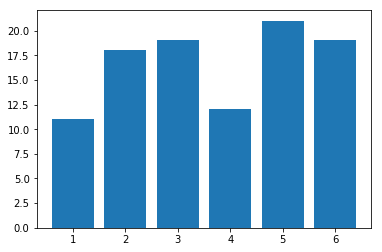

In [3]:
# list with possible values when throwing a dice [1,2,3,4,5,6]
diceValues = list(range(1, 7))
# list which will be later used to store the probabilities for the numbers that we have thrown
propDice = []
# create a histogram (could also be done with np.unique())
for i in diceValues:
    # count the number of throwing a 1, 2, 3, ... and append it to the list
    propDice.append(len(np.where(dice == i)[0]))
# convert list to a numpy array to apply arithmetic operation
propDice = np.array(propDice)
# plot the histogram
plt.bar(diceValues, propDice)
plt.show()

Nun teilen wir noch die Vorkommen der verschiedenen Augenanzahl durch die Anzahl der Experimente *nTrials*, welche wir durchgeführt haben. 

probility function: [0.11 0.18 0.19 0.12 0.21 0.19]
Sum of the probility function values: 1.0


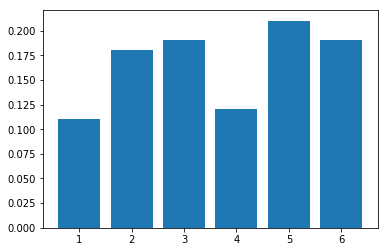

In [4]:
# calculate probabilities from the histogram
propDice = propDice / nTrials
print("probility function: {0}".format(propDice))
print("Sum of the probility function values: {0}".format(np.sum(propDice)))
# visualize the result
plt.bar(diceValues, propDice)
plt.show()

## Aufgabe: Verteilungsfunktion
Nun bestimmen wir die Verteilungsfunktion $F(x) = \sum_{x_i \leq x} f(x_i)$.

In [5]:
dist = []
# calculate the distribution function
for diceValue in diceValues: 
    sum = 0
    '''
    Your solution here!!!
    Hint: 
    Calculate the appropriate value for the variable sum. 
    The probability function is stored as numpy array propDice.
    You can work with slicing - propDice[a:b] returns an array with the values of probDice from a to b.
    You can use np.sum() to sum up the values of an array.
    '''
    # sum up the probabilities always to a certain dice value, e.g. form 1 to 1, from 1 to 2, from 1 to 3
    sum = np.sum(propDice[:diceValue])
    '''
    End of solution!!!
    '''
    dist.append(sum)
# insert 0 for the visualisation
dist.insert(0, 0)
print("distribution function: {0}".format(dist))

distribution function: [0, 0.11, 0.29, 0.48, 0.6, 0.8099999999999999, 1.0]


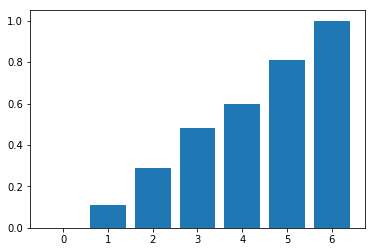

In [6]:
# values of the dice of the distribution function
distValues = list(range(7))
plt.bar(distValues, dist)
plt.show()

Um die Wahrscheinlichkeit zu ermitteln, dass einen Wurf zwischen 3 und inklusive 5 zu werfen, können wir die Verteilungsfunktion nutzen. Hierbei verwenden wir die Formel: $Pr(3 < X \leq 5) = F(5) - F(3)$.

In [7]:
# P(3 < X <= 5) = F(5) - F(3)
prob = dist[5] - dist[3]
print(prob)

0.32999999999999996


## Erwartungswert
Zuletzt bestimmt wir noch den Erwartungswert $E = \sum x_i \cdot f(x_i)$ der Wahrscheinlichkeitsfunktion. Der Erwartungswert gibt an, welche Zahl die Zufallsvariable im Mittel annimmt. 

In [8]:
# pointwise multiplication
E = np.multiply(diceValues, propDice)
# sum up all weighted values
E = np.sum(E)
print(E)

3.7100000000000004
